In [1]:
# Dependencies
import requests
import json
import pandas as pd
from pymongo import MongoClient
import mplfinance as mpf

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

# Define the database in Mongo
db = mongo['stock']

In [3]:
stock_data = db.stock_data
stock_data

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stock'), 'stock_data')

## Top Gainer Analysis (AKRO)

In [4]:
query = {'symbol': "AKRO"}
akro = list(stock_data.find(query))
for items in akro:
    print(items)

{'_id': ObjectId('67999ea098dcbe9f8977a545'), '1. open': '54.6300', '2. high': '57.4800', '3. low': '49.3800', '4. close': '51.4700', '5. volume': '5195514', 'date': '2025-01-28', 'symbol': 'AKRO'}
{'_id': ObjectId('67999ea098dcbe9f8977a546'), '1. open': '57.2600', '2. high': '58.4000', '3. low': '48.4705', '4. close': '51.7100', '5. volume': '15270330', 'date': '2025-01-27', 'symbol': 'AKRO'}
{'_id': ObjectId('67999ea098dcbe9f8977a547'), '1. open': '26.1100', '2. high': '26.4740', '3. low': '25.6900', '4. close': '26.1800', '5. volume': '1271188', 'date': '2025-01-24', 'symbol': 'AKRO'}
{'_id': ObjectId('67999ea098dcbe9f8977a548'), '1. open': '24.7700', '2. high': '26.2300', '3. low': '24.6900', '4. close': '26.1600', '5. volume': '632070', 'date': '2025-01-23', 'symbol': 'AKRO'}
{'_id': ObjectId('67999ea098dcbe9f8977a549'), '1. open': '25.6000', '2. high': '25.9550', '3. low': '24.7300', '4. close': '25.0200', '5. volume': '876748', 'date': '2025-01-22', 'symbol': 'AKRO'}
{'_id': Obj

In [5]:
akro_df = pd.DataFrame(akro)
akro_df.head()

,_id,1. open,2. high,3. low,4. close,5. volume,date,symbol
0,67999ea098dcbe9f8977a545,54.6300,57.4800,49.3800,51.4700,5195514,2025-01-28,AKRO
1,67999ea098dcbe9f8977a546,57.2600,58.4000,48.4705,51.7100,15270330,2025-01-27,AKRO
2,67999ea098dcbe9f8977a547,26.1100,26.4740,25.6900,26.1800,1271188,2025-01-24,AKRO
3,67999ea098dcbe9f8977a548,24.7700,26.2300,24.6900,26.1600,632070,2025-01-23,AKRO
4,67999ea098dcbe9f8977a549,25.6000,25.9550,24.7300,25.0200,876748,2025-01-22,AKRO


In [6]:
# Dropping the unnecessary columns
akro2_df = akro_df.drop(columns=['_id', 'symbol'])
akro2_df.head()

,1. open,2. high,3. low,4. close,5. volume,date
0,54.6300,57.4800,49.3800,51.4700,5195514,2025-01-28
1,57.2600,58.4000,48.4705,51.7100,15270330,2025-01-27
2,26.1100,26.4740,25.6900,26.1800,1271188,2025-01-24
3,24.7700,26.2300,24.6900,26.1600,632070,2025-01-23
4,25.6000,25.9550,24.7300,25.0200,876748,2025-01-22


In [7]:
# Cleaning up the column names
cleaned_akro = akro2_df.rename(columns=
                   {'1. open': 'Open',
                    '2. high': 'High',
                    '3. low': 'Low',
                    '4. close': 'Close',
                    '5. volume': 'Volume',
                    'date' : 'Date'
                    })
cleaned_akro.head()

,Open,High,Low,Close,Volume,Date
0,54.6300,57.4800,49.3800,51.4700,5195514,2025-01-28
1,57.2600,58.4000,48.4705,51.7100,15270330,2025-01-27
2,26.1100,26.4740,25.6900,26.1800,1271188,2025-01-24
3,24.7700,26.2300,24.6900,26.1600,632070,2025-01-23
4,25.6000,25.9550,24.7300,25.0200,876748,2025-01-22


In [8]:
cleaned_akro.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
Date      object
dtype: object

In [9]:
# Convert the date from an object into a datetime format
cleaned_akro['Date'] = pd.to_datetime(cleaned_akro['Date'])


In [10]:
# Check the results
cleaned_akro.dtypes

Open              object
High              object
Low               object
Close             object
Volume            object
Date      datetime64[ns]
dtype: object

In [11]:
# Convert the objects to floats
cleaned_akro['Open'] = cleaned_akro['Open'].astype(float)
cleaned_akro['High'] = cleaned_akro['High'].astype(float)
cleaned_akro['Low'] = cleaned_akro['Low'].astype(float)
cleaned_akro['Close'] = cleaned_akro['Close'].astype(float)
cleaned_akro['Volume'] = cleaned_akro['Volume'].astype(float)

In [12]:
# Check the results
cleaned_akro.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Date      datetime64[ns]
dtype: object

In [13]:
# Change the index to the Date column
cleaned_akro.set_index('Date', inplace=True)
cleaned_akro.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-28,54.63,57.480,49.3800,51.47,5195514.0
2025-01-27,57.26,58.400,48.4705,51.71,15270330.0
2025-01-24,26.11,26.474,25.6900,26.18,1271188.0
2025-01-23,24.77,26.230,24.6900,26.16,632070.0
2025-01-22,25.60,25.955,24.7300,25.02,876748.0


### Charts

/opt/anaconda3/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


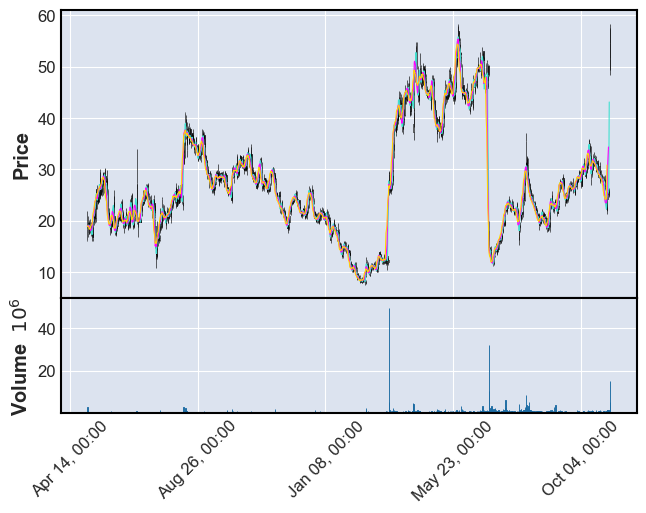

In [14]:
# Candlestick chart
mpf.plot(cleaned_akro.iloc[:3000],
         type='candle',
         mav=(3,6,9),
         volume=True,
         show_nontrading=True)


In [ ]:
# # BASIC line chart
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
# plt.plot(cleaned_akro['close'], 
#          label = 'AKRO Closing Price', 
#          color = 'blue')
# plt.title('AKRO Stock Price Movement')
# plt.xlabel('Date')
# plt.ylabel('Price (USD)')
# plt.legend()
# plt.grid()
# plt.show()

In [16]:
# Increase/Decreasing lines
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
                x=cleaned_akro.index,
                open=cleaned_akro['Open'],
                high=cleaned_akro['High'],
                low=cleaned_akro['Low'],
                close=cleaned_akro['Close'], 
                increasing_line_color= 'yellow', 
                decreasing_line_color= 'black')
                ])

# Add details on the chart
fig.add_trace(go.Scatter())
fig.update_layout(
    title = "Increase/Decrease of AKRO Stock",
    yaxis_title = "AKRO Stock"
)
fig.show()

## Loser Stock Analysis (NRO)

In [17]:
query = {'symbol': "NRO"}
nro = list(stock_data.find(query))
for items in nro:
    print(items)

{'_id': ObjectId('67999ea198dcbe9f8977aac7'), '1. open': '3.3900', '2. high': '3.4200', '3. low': '3.3600', '4. close': '3.3900', '5. volume': '448268', 'date': '2025-01-28', 'symbol': 'NRO'}
{'_id': ObjectId('67999ea198dcbe9f8977aac8'), '1. open': '3.3800', '2. high': '3.4000', '3. low': '3.3600', '4. close': '3.3600', '5. volume': '286997', 'date': '2025-01-27', 'symbol': 'NRO'}
{'_id': ObjectId('67999ea198dcbe9f8977aac9'), '1. open': '3.4000', '2. high': '3.4396', '3. low': '3.4000', '4. close': '3.4000', '5. volume': '351552', 'date': '2025-01-24', 'symbol': 'NRO'}
{'_id': ObjectId('67999ea198dcbe9f8977aaca'), '1. open': '3.4000', '2. high': '3.4620', '3. low': '3.3900', '4. close': '3.4000', '5. volume': '556380', 'date': '2025-01-23', 'symbol': 'NRO'}
{'_id': ObjectId('67999ea198dcbe9f8977aacb'), '1. open': '3.6900', '2. high': '3.6900', '3. low': '3.5600', '4. close': '3.5650', '5. volume': '406624', 'date': '2025-01-22', 'symbol': 'NRO'}
{'_id': ObjectId('67999ea198dcbe9f8977aa

In [18]:
nro_df = pd.DataFrame(nro)
nro_df.head()

,_id,1. open,2. high,3. low,4. close,5. volume,date,symbol
0,67999ea198dcbe9f8977aac7,3.3900,3.4200,3.3600,3.3900,448268,2025-01-28,NRO
1,67999ea198dcbe9f8977aac8,3.3800,3.4000,3.3600,3.3600,286997,2025-01-27,NRO
2,67999ea198dcbe9f8977aac9,3.4000,3.4396,3.4000,3.4000,351552,2025-01-24,NRO
3,67999ea198dcbe9f8977aaca,3.4000,3.4620,3.3900,3.4000,556380,2025-01-23,NRO
4,67999ea198dcbe9f8977aacb,3.6900,3.6900,3.5600,3.5650,406624,2025-01-22,NRO


In [19]:
# Dropping the unnecessary columns
nro2_df = nro_df.drop(columns=['_id', 'symbol'])
nro2_df.head()

,1. open,2. high,3. low,4. close,5. volume,date
0,3.3900,3.4200,3.3600,3.3900,448268,2025-01-28
1,3.3800,3.4000,3.3600,3.3600,286997,2025-01-27
2,3.4000,3.4396,3.4000,3.4000,351552,2025-01-24
3,3.4000,3.4620,3.3900,3.4000,556380,2025-01-23
4,3.6900,3.6900,3.5600,3.5650,406624,2025-01-22


In [20]:
# Cleaning up the column names
cleaned_nro = nro2_df.rename(columns=
                   {'1. open': 'open',
                    '2. high': 'high',
                    '3. low': 'low',
                    '4. close': 'close',
                    '5. volume': 'volume'})
cleaned_nro.head()

,open,high,low,close,volume,date
0,3.3900,3.4200,3.3600,3.3900,448268,2025-01-28
1,3.3800,3.4000,3.3600,3.3600,286997,2025-01-27
2,3.4000,3.4396,3.4000,3.4000,351552,2025-01-24
3,3.4000,3.4620,3.3900,3.4000,556380,2025-01-23
4,3.6900,3.6900,3.5600,3.5650,406624,2025-01-22


In [21]:
# Convert the date from an object into a datetime format
cleaned_nro['date'] = pd.to_datetime(cleaned_nro['date'])

In [22]:
# Convert the objects to floats
cleaned_nro['open'] = cleaned_nro['open'].astype(float)
cleaned_nro['high'] = cleaned_nro['high'].astype(float)
cleaned_nro['low'] = cleaned_nro['low'].astype(float)
cleaned_nro['close'] = cleaned_nro['close'].astype(float)
cleaned_nro['volume'] = cleaned_nro['volume'].astype(float)

In [23]:
# Check the results
cleaned_nro.dtypes

open             float64
high             float64
low              float64
close            float64
volume           float64
date      datetime64[ns]
dtype: object

In [24]:
# Change the index to the Date column
cleaned_nro.set_index('date', inplace=True)
cleaned_nro.head()

,open,high,low,close,volume
date,,,,,
2025-01-28,3.39,3.4200,3.36,3.390,448268.0
2025-01-27,3.38,3.4000,3.36,3.360,286997.0
2025-01-24,3.40,3.4396,3.40,3.400,351552.0
2025-01-23,3.40,3.4620,3.39,3.400,556380.0
2025-01-22,3.69,3.6900,3.56,3.565,406624.0


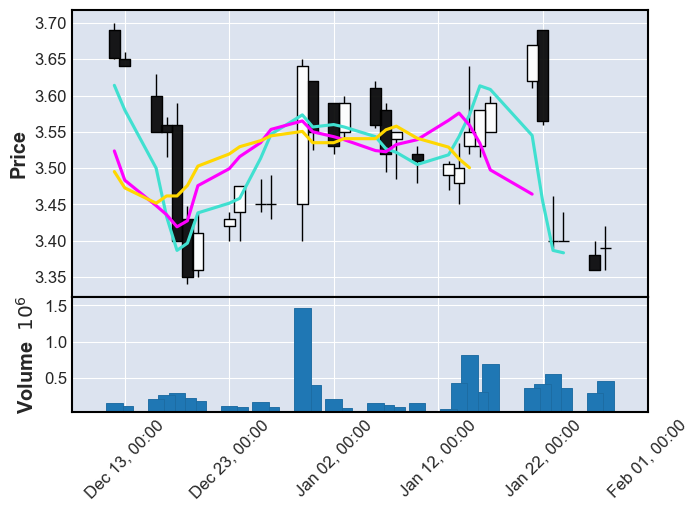

In [25]:
mpf.plot(cleaned_nro.iloc[:30],type='candle',mav=(3,6,9),volume=True,show_nontrading=True)


In [2]:
# Increase/Decreasing lines
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
                x=cleaned_nro.index,
                open=cleaned_nro['Open'],
                high=cleaned_nro['High'],
                low=cleaned_nro['Low'],
                close=cleaned_nro['Close'], 
                increasing_line_color= 'yellow', 
                decreasing_line_color= 'black')
                ])

# Add details on the chart
fig.add_trace(go.Scatter())
fig.update_layout(
    title = "Increase/Decrease of NRO Stock",
    yaxis_title = "NRO Stock"
)
fig.show()

NameError: name 'cleaned_nro' is not defined